#Load Datasets

In [ ]:
from keras.datasets import cifar10
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random
from skimage import color
from skimage import io

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 4s 0us/step


In [ ]:
ImgLabel = ["phone", "car", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

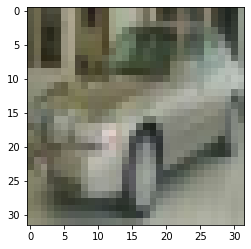

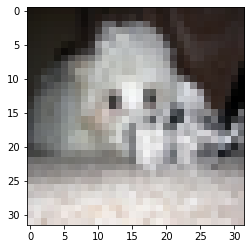

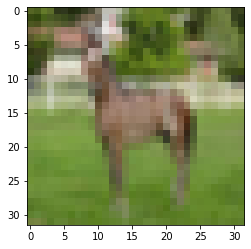

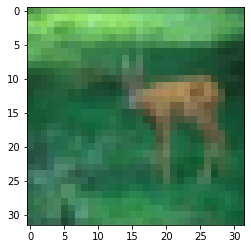

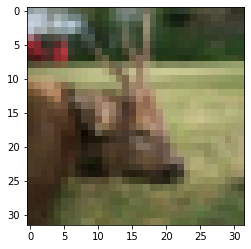

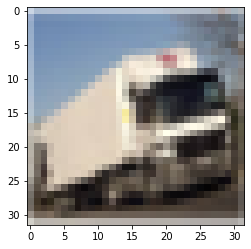

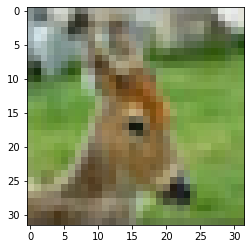

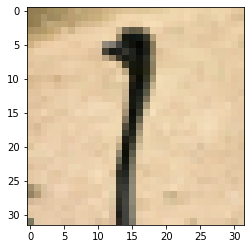

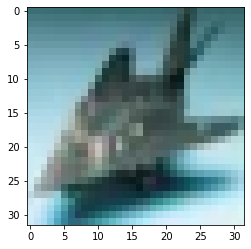

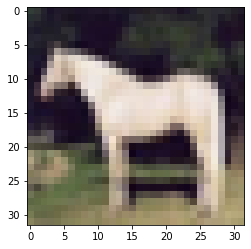

In [ ]:
RandIndex = random.sample(range(1, x_train.shape[0]), 10)
for i in RandIndex:
  plt.figure()
  plt.imshow(x_train[i])
  

#Data Normalize

In [ ]:
x_train = color.rgb2gray(x_train)
x_train = (x_train - np.min(x_train)) / (np.max(x_train) - np.min(x_train))


In [ ]:
x_test = color.rgb2gray(x_test)
x_test = (x_test - np.min(x_test)) / (np.max(x_test) - np.min(x_test))


In [ ]:
(x_train, x_valid) = x_train[5000:], x_train[:5000]
(y_train, y_valid) = y_train[5000:], y_train[:5000]

In [ ]:
x_train = x_train.reshape(x_train.shape[0],32,32,1)
x_valid = x_valid.reshape(x_valid.shape[0],32,32,1)
x_test = x_test.reshape(x_test.shape[0],32,32,1)
  

#Creat Model

In [ ]:
from keras import layers
from keras.models import Sequential

In [ ]:
model = Sequential()

model.add(layers.Conv2D(filters = 64, kernel_size = 2, padding = 'same', activation = 'relu', input_shape = (32, 32, 1))) 
model.add(layers.MaxPooling2D(pool_size = 2))

model.add(layers.Conv2D(filters = 64, kernel_size = 2, padding = 'same', activation = 'relu'))
model.add(layers.MaxPooling2D(pool_size = 2))


model.add(layers.Flatten())
model.add(layers.Dense(512, activation = 'sigmoid'))
model.add(layers.Dense(10, activation = 'softmax'))


model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 64)        320       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 16, 16, 64)        16448     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 4096)              0         
                                                                 
 dense_6 (Dense)             (None, 512)              

#Compile Model

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
import datetime
start = datetime.datetime.now()
trainedModel = model.fit(x_train, y_train, batch_size = 128, epochs = 15, validation_data = (x_valid,y_valid))
end = datetime.datetime.now()
print('runtime = ', end - start)

Epoch 1/15
352/352 [==============================] - 4s 10ms/step - loss: 1.7524 - accuracy: 0.3801 - val_loss: 1.4638 - val_accuracy: 0.4926
Epoch 2/15
352/352 [==============================] - 3s 9ms/step - loss: 1.3963 - accuracy: 0.5116 - val_loss: 1.3383 - val_accuracy: 0.5308
Epoch 3/15
352/352 [==============================] - 3s 9ms/step - loss: 1.2581 - accuracy: 0.5644 - val_loss: 1.2059 - val_accuracy: 0.5858
Epoch 4/15
352/352 [==============================] - 3s 9ms/step - loss: 1.1546 - accuracy: 0.5971 - val_loss: 1.1729 - val_accuracy: 0.5806
Epoch 5/15
352/352 [==============================] - 3s 9ms/step - loss: 1.0763 - accuracy: 0.6244 - val_loss: 1.1169 - val_accuracy: 0.6060
Epoch 6/15
352/352 [==============================] - 3s 10ms/step - loss: 1.0139 - accuracy: 0.6468 - val_loss: 1.0609 - val_accuracy: 0.6290
Epoch 7/15
352/352 [==============================] - 3s 9ms/step - loss: 0.9464 - accuracy: 0.6726 - val_loss: 1.0387 - val_accuracy: 0.6354
Epoc

In [ ]:
import numpy as np
y_pred = np.argmax(model.predict(x_test), axis=-1)

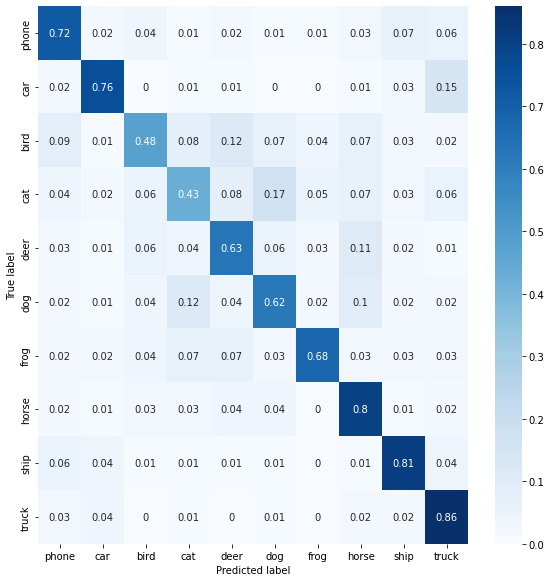

In [ ]:
import pandas as pd
import seaborn as sns

from sklearn.metrics import confusion_matrix
conf_m = tf.math.confusion_matrix(labels = y_test, predictions = y_pred).numpy()
conf_m_norm = np.around(conf_m.astype('float') / conf_m.sum(axis=1)[:, np.newaxis], decimals=2)
conf_m_df = pd.DataFrame(conf_m_norm, index = ImgLabel, columns = ImgLabel)
figure = plt.figure(figsize=(8, 8))
sns.heatmap(conf_m_df, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

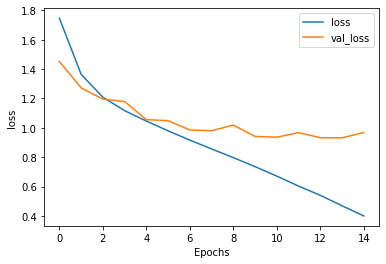

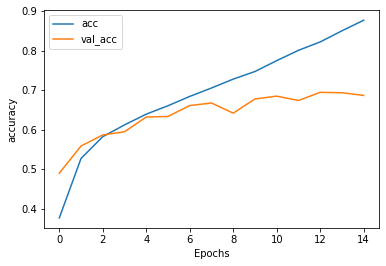

In [ ]:
history = trainedModel.history
loss = history['loss']
val_loss = history['val_loss']
acc = history['accuracy']
val_acc = history['val_accuracy']
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.plot(loss)
plt.plot(val_loss)
plt.legend(['loss','val_loss'])
plt.figure()
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.plot(acc)
plt.plot(val_acc)
plt.legend(['acc','val_acc'])

In [ ]:
from sklearn.metrics import precision_score , recall_score, f1_score, accuracy_score
test_loss,test_accuracy = model.evaluate(x_test,y_test)
print('test loss = %f' % test_loss)
print('test accuracy = %f' % test_accuracy)
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, y_pred, average='macro')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, y_pred, average='macro')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_pred, average='macro')
print('F1 score: %f' % f1)

313/313 [==============================] - 3s 9ms/step - loss: 0.9999 - accuracy: 0.6790
test loss = 0.999932
test accuracy = 0.679000
Accuracy: 0.679000
Precision: 0.678722
Recall: 0.679000
F1 score: 0.674469
